# Schematic figure of block-averaged sources

Import packages

In [1]:
from pathlib import Path
import numpy as np
import verde as vd
import matplotlib.pyplot as plt

from boost_and_layouts import block_averaged_sources


Define parameters

In [2]:
region = (-50e3, 50e3, -50e3, 50e3)

n_data = 30
spacing = 25000
seed = 1234
height = 1000
depth = 100

/home/santi/miniconda3/envs/eql-gradient-boosted/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Create random observation points

In [3]:
coordinates = vd.scatter_points(
    region, size=n_data, random_state=seed, extra_coords=height
)

Create block-averaged sources

In [4]:
points = block_averaged_sources(
    coordinates, depth=depth, spacing=spacing, depth_type="constant_depth"
)

Create grid lines

In [5]:
grid_nodes = vd.grid_coordinates(vd.get_region(coordinates), spacing=spacing)

grid_lines = (np.unique(grid_nodes[0]), np.unique(grid_nodes[1]))
for nodes in grid_lines:
    nodes.sort()

Plot figure

No handles with labels found to put in legend.


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


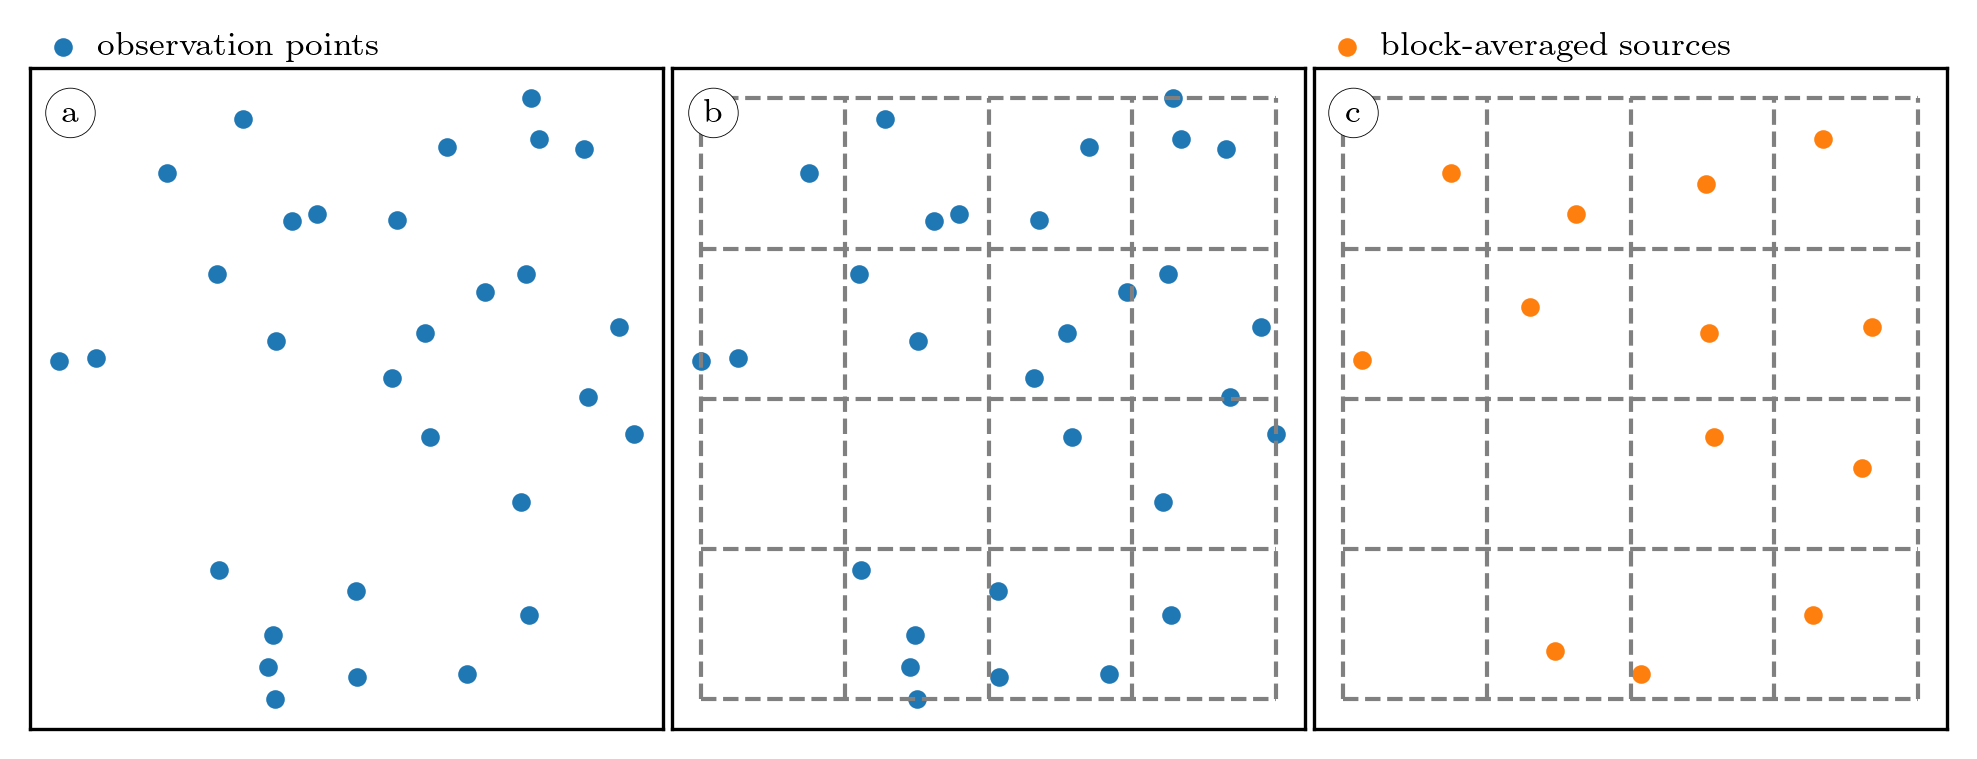

In [6]:
# Load matplotlib configuration
plt.style.use(Path(".") / "matplotlib.rc")

# Boundaries of the grid
xmin, xmax, ymin, ymax = vd.get_region(coordinates)

# Define styles and axes labels
grid_style = dict(color="grey", linewidth=1, linestyle="--")
scatter_style = dict(s=12)
labels = "a b c".split()

# Initialize figure and axes
width = 6.66
height = width / 3 * 1.1
fig, axes = plt.subplots(
    ncols=3, nrows=1, sharey=True, sharex=True, figsize=(width, height)
)

# Plot coordinates
ax = axes[0]
coords_scatter = ax.scatter(
    *coordinates[:2], label="observation points", **scatter_style
)

# Plot coordinates and grid
ax = axes[1]
for x in grid_lines[0]:
    ax.plot((x, x), (ymin, ymax), **grid_style)
for y in grid_lines[1]:
    ax.plot((xmin, xmax), (y, y), **grid_style)
ax.scatter(*coordinates[:2], **scatter_style)

# Plot block-averaged sources and grid
ax = axes[2]
for x in grid_lines[0]:
    ax.plot((x, x), (ymin, ymax), **grid_style)
for y in grid_lines[1]:
    ax.plot((xmin, xmax), (y, y), **grid_style)
sources_scatter = ax.scatter(
    *points[:2], color="C1", label="block-averaged sources", **scatter_style
)

# Configure axes
for ax, label in zip(axes, labels):
    ax.annotate(
        label,
        xy=(0.05, 0.92),
        xycoords="axes fraction",
        bbox=dict(boxstyle="circle", fc="white", lw=0.2),
    )
    ax.set_aspect("equal")
    ax.tick_params(
        axis="y",
        which="both",
        left=False,
        right=False,
        labelleft=False,
    )
    ax.tick_params(
        axis="x",
        which="both",
        bottom=False,
        top=False,
        labelbottom=False,
    )
    ax.legend(
        loc="lower left",
        bbox_to_anchor=(0, 1.01),
        ncol=2,
        frameon=False,
        borderpad=0,
        borderaxespad=0,
        handletextpad=0,
        labelspacing=0,
        columnspacing=0,
        # fontsize=7,
    )

plt.tight_layout(w_pad=0)
plt.savefig(
    Path("..") / "manuscript" / "figs" / "block-averaged-sources-schematics.pdf"
)
plt.show()